In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8a0a4ecf68d5a71f7e59d6755911556652e0e00128380f4a5cd4132164f1dc53
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


54.157835375041905


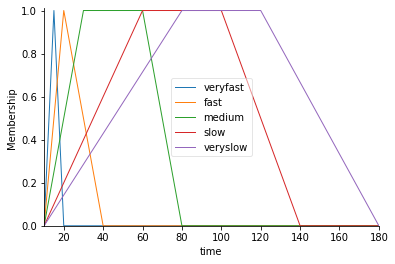

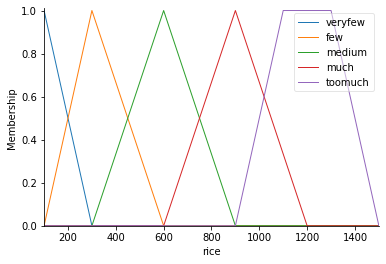

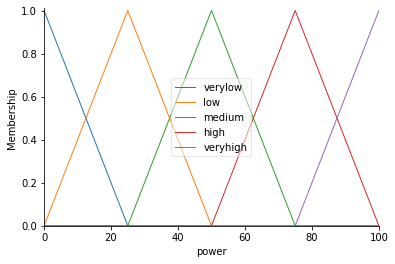

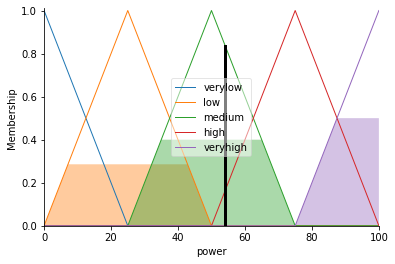

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['veryfast'] = fuzz.trimf(time.universe, [10,15,20])
time['fast'] = fuzz.trimf(time.universe, [10,20,40])
time['medium'] = fuzz.trapmf(time.universe, [10,30,60,80])
time['slow'] = fuzz.trapmf(time.universe, [10,60,100,140])
time['veryslow'] = fuzz.trapmf(time.universe, [10,80,120,180])

rice['veryfew'] = fuzz.trimf(rice.universe, [100,100,300])
rice['few'] = fuzz.trimf(rice.universe, [100,300,600])
rice['medium'] = fuzz.trimf(rice.universe, [300,600,900])
rice['much'] = fuzz.trimf(rice.universe, [600,900,1200])
rice['toomuch'] = fuzz.trapmf(rice.universe, [900,1100,1300,1500])

power['verylow'] = fuzz.trimf(power.universe, [0,0,25])
power['low'] = fuzz.trimf(power.universe, [0,25,50])
power['medium'] = fuzz.trimf(power.universe, [25,50,75])
power['high'] = fuzz.trimf(power.universe, [50,75,100])
power['veryhigh'] = fuzz.trimf(power.universe, [75,100,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(rice['veryfew']&time['veryslow'],power['verylow'])
rule2 = ctrl.Rule(rice['few']&time['veryslow'],power['verylow'])
rule3 = ctrl.Rule(rice['veryfew']&time['slow'],power['verylow'])
rule4 = ctrl.Rule(rice['medium']&time['veryslow'],power['verylow'])
rule5 = ctrl.Rule(rice['veryfew']&time['medium'],power['verylow'])

rule6 = ctrl.Rule(rice['few']&time['slow'],power['low'])
rule7 = ctrl.Rule(rice['much']&time['veryslow'],power['low'])
rule8 = ctrl.Rule(rice['veryfew']&time['fast'],power['low'])
rule9 = ctrl.Rule(rice['few']&time['medium'],power['low'])
rule10 = ctrl.Rule(rice['medium']&time['slow'],power['low'])

rule11 = ctrl.Rule(rice['medium']&time['medium'],power['medium'])
rule12 = ctrl.Rule(rice['veryfew']&time['veryfast'],power['medium'])
rule13 = ctrl.Rule(rice['toomuch']&time['veryslow'],power['medium'])
rule14 = ctrl.Rule(rice['much']&time['slow'],power['medium'])
rule15 = ctrl.Rule(rice['few']&time['fast'],power['medium'])

rule16 = ctrl.Rule(rice['veryfew']&time['veryslow'],power['high'])
rule17 = ctrl.Rule(rice['veryfew']&time['veryslow'],power['high'])
rule18 = ctrl.Rule(rice['veryfew']&time['veryslow'],power['high'])
rule19 = ctrl.Rule(rice['veryfew']&time['veryslow'],power['high'])
rule20 = ctrl.Rule(rice['veryfew']&time['veryslow'],power['high'])

rule21 = ctrl.Rule(rice['toomuch']&time['veryfast'],power['veryhigh'])
rule22 = ctrl.Rule(rice['toomuch']&time['fast'],power['veryhigh'])
rule23 = ctrl.Rule(rice['much']&time['veryfast'],power['veryhigh'])
rule24 = ctrl.Rule(rice['medium']&time['veryfast'],power['veryhigh'])
rule25 = ctrl.Rule(rice['toomuch']&time['medium'],power['veryhigh'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,
                                   rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15,
                                   rule16,rule17,rule18,rule19,rule20,
                                   rule21,rule22,rule23,rule24,rule25,])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']=30
powering.input['rice']=1000

powering.compute()
print(powering.output['power'])
power.view(sim=powering)